# Análisis, Visualización y Curación de Datos

# Consigna 6

#### Calcular el tamaño del vocabulario del tutor y del estudiante por separado. Calcular los mismos valores pero eliminando las palabras que se repiten 3 o menos veces.


## Importación de modulos
---

In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from collections import Counter

from columns_to_keep import C2K
from type_to_fix import T2F

np.random.seed(654802)

## Carga la tabla de mensajes preprocesados
---

In [2]:
data_dir = os.path.join('..', 'dataset')
data_file_name = 'tiny_yup_messages_preprocessed.csv'
full_data_file_name = os.path.join(data_dir, data_file_name)
dfd = pd.read_csv(full_data_file_name)
display(dfd.shape)

(7441, 6)

### Conversion de `str` a `list` campo text

In [3]:
dfd['text'] = dfd.text.apply(lambda x: literal_eval(x))

## Cálculos
---

**Pasos:**

1. Conteo de palabras de estudiantes y tutores por separado
    1. Unigramas
    2. Bigramas
    3. Trigramas
2. Filtrado de palabras (unigramas) que no se repiten más de tres veces


In [57]:
# 1.1
students_counts = Counter([ token for tokens in dfd[dfd.sent_from=='student'].text  for token in tokens])
tutores_counts = Counter([ token for tokens in dfd[dfd.sent_from=='tutor'].text  for token in tokens])

# 1.2
stud_counts_bg = [' '.join(tokens[i:2+i]) for tokens in dfd[dfd.sent_from=='student'].text for i in range(len(tokens)-2+1)]
tuto_counts_bg = [' '.join(tokens[i:2+i]) for tokens in dfd[dfd.sent_from=='tutor'].text for i in range(len(tokens)-2+1)]
stud_counts_bg = Counter(stud_counts_bg)
tuto_counts_bg = Counter(tuto_counts_bg)

# 1.3
stud_counts_tg = [' '.join(tokens[i:3+i]) for tokens in dfd[dfd.sent_from=='student'].text for i in range(len(tokens)-3+1)]
tuto_counts_tg = [' '.join(tokens[i:3+i]) for tokens in dfd[dfd.sent_from=='tutor'].text for i in range(len(tokens)-3+1)]
stud_counts_tg = Counter(stud_counts_tg)
tuto_counts_tg = Counter(tuto_counts_tg)

# 2.
students_counts_wr = list(filter(lambda x:x[1]>3, students_counts.most_common()))
tutores_counts_wr = list(filter(lambda x:x[1]>3, tutores_counts.most_common()))

In [5]:
len_students_counts = len(students_counts)
len_tutores_counts = len(tutores_counts)

len_students_counts_wr = len(students_counts_wr)
len_tutores_counts_wr = len(tutores_counts_wr)

display('### Estudiantes: ###')
display(f'Tamaño del vocabulario de los estudiantes: {len_students_counts}')
display(f'Tamaño del vocabulario de los estudiantes con palabras repetidas más de 3 veces: {len_students_counts_wr}')
display(f'El vocabulario se redujo al {100*len_students_counts_wr/len_students_counts:.2f}% del original')

display('### Tutores: ###')
display(f'Tamaño del vocabulario de los tutores: {len_tutores_counts}')
display(f'Tamaño del vocabulario de los estudiantes con palabras repetidas más de 3 veces: {len_tutores_counts_wr}')
display(f'El vocabulario se redujo al {100*len_tutores_counts_wr/len_tutores_counts:.2f}% del original')

'### Estudiantes: ###'

'Tamaño del vocabulario de los estudiantes: 1648'

'Tamaño del vocabulario de los estudiantes con palabras repetidas más de 3 veces: 410'

'El vocabulario se redujo al 24.88% del original'

'### Tutores: ###'

'Tamaño del vocabulario de los tutores: 2444'

'Tamaño del vocabulario de los estudiantes con palabras repetidas más de 3 veces: 750'

'El vocabulario se redujo al 30.69% del original'

# Consigna 7

#### Realizar un gráfico frecuencia de unigramas del tutor. ¿Se cumple la ley de Zipf? Visualizar los 20 unigramas más frecuentes, los 20 unigramas menos frecuentes y 20 unigramas aleatorios en el medio de la distribución. Tratar de caracterizar las palabras, sacar conclusiones sobre qué tipo de palabras son, si son valiosas o no y cómo podríamos explotarlas o eliminar el ruido que traen. Hacer lo mismo para 2-gramas y 3 gramas.

In [7]:
t_unigrams_counts = [i[1] for i in tutores_counts.most_common()]
t_unigrams = [i[0] for i in tutores_counts.most_common()]

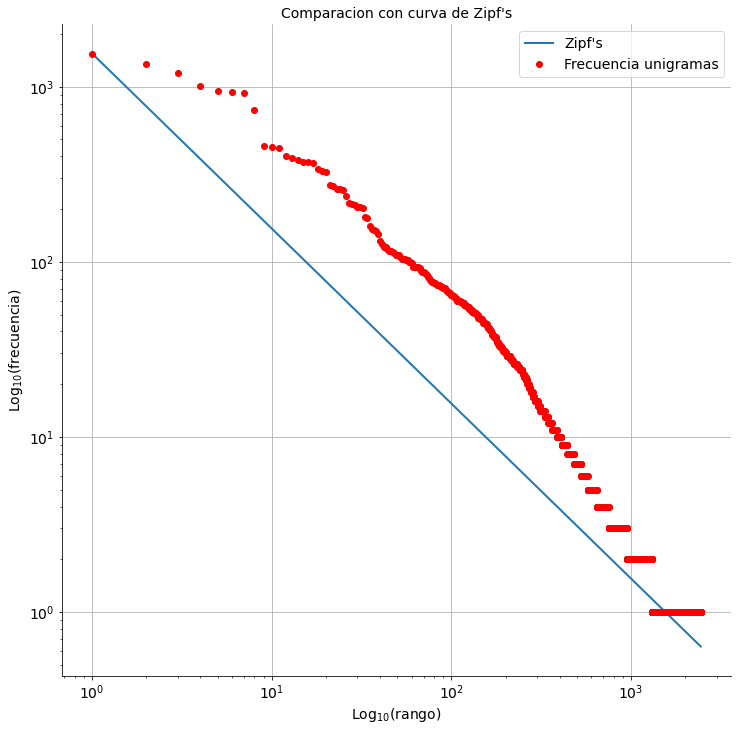

In [11]:
s = 1
n = np.array(list(range(1,1+len(t_unigrams_counts))))
nn = t_unigrams_counts[0] / (n**s)

plt.figure(figsize=(12,12))
plt.loglog(n, nn, linewidth=2, label="Zipf's")
plt.loglog(n, t_unigrams_counts, 'or', label="Frecuencia unigramas")
plt.grid(True)
plt.xlabel(r'Log$_{10}$(rango)', fontsize=14)
plt.ylabel(r'Log$_{10}$(frecuencia)', fontsize=14)
plt.title("Comparacion con curva de Zipf's", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
sns.despine()

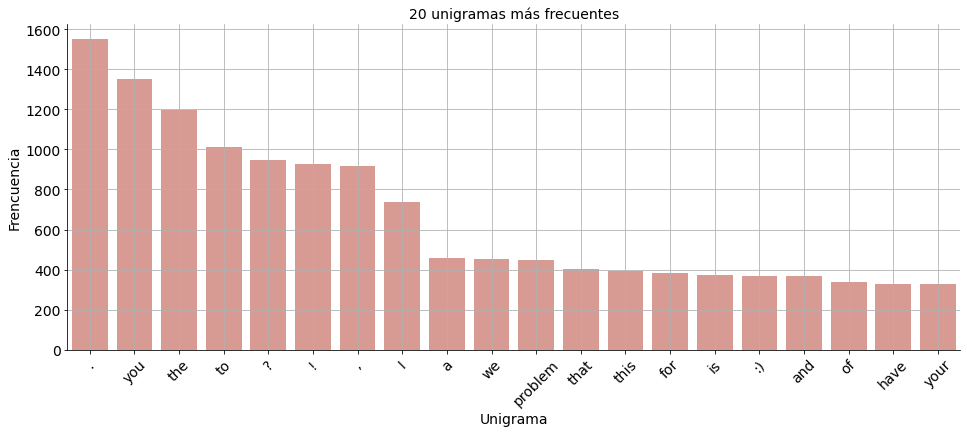

In [14]:
plt.figure(figsize=(16,6))
chart = sns.barplot(x=t_unigrams[0:20], y=t_unigrams_counts[0:20], color="salmon", saturation=.5)
plt.grid(True)
plt.xlabel('Unigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 unigramas más frecuentes', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
sns.despine()

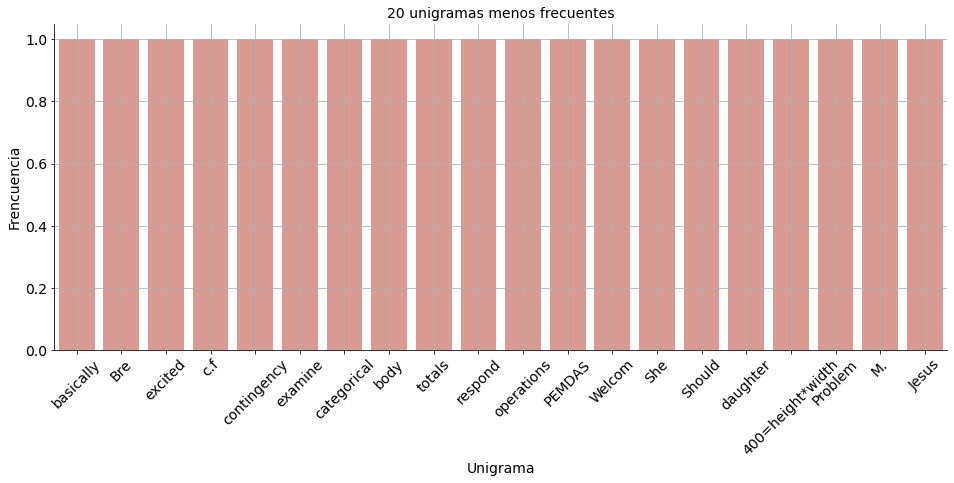

In [13]:
plt.figure(figsize=(16,6))
chart = sns.barplot(x=t_unigrams[-20::1], y=t_unigrams_counts[-20::1], color="salmon", saturation=.5)
plt.grid(True)
plt.xlabel('Unigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 unigramas menos frecuentes', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
sns.despine()

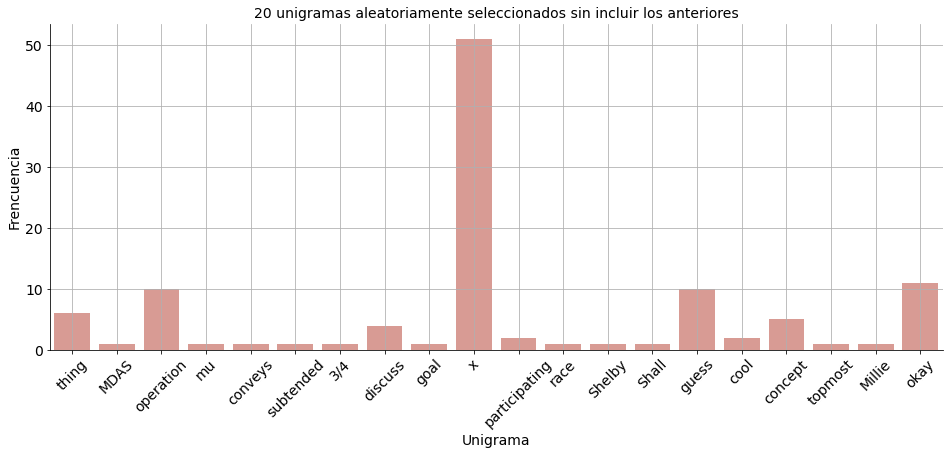

In [25]:
sample_indexs = np.random.randint(20, len_tutores_counts -20 -1, 20)

plt.figure(figsize=(16,6))
chart = sns.barplot(x=np.array(t_unigrams)[sample_indexs], y=np.array(t_unigrams_counts)[sample_indexs], color="salmon", saturation=.5)
plt.grid(True)
plt.xlabel('Unigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 unigramas aleatoriamente seleccionados sin incluir los anteriores', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
sns.despine()